Scikit-Learn 1

In [39]:
import seaborn as sns

Importing Data

In [2]:
iris=sns.load_dataset('iris')

In [5]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Exploring the data

In [7]:
X_iris=iris.drop('species', axis=1)
X_iris.shape

(150, 4)

In [8]:
y_iris=iris['species']
y_iris.shape

(150,)

In [9]:
import matplotlib.pyplot as plt
import numpy as np

In [10]:
rng=np.random.RandomState(42)

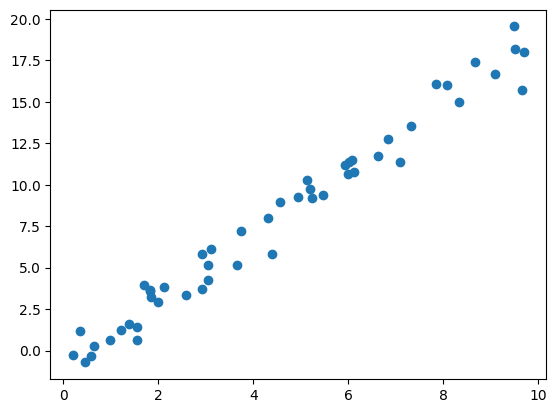

In [11]:
x=10*rng.rand(50)
y=2*x-1+rng.randn(50)
plt.scatter(x,y)

Building the model

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
model=LinearRegression(fit_intercept=True)
model

LinearRegression()

In [14]:
X=x[:,np.newaxis]
X.shape

(50, 1)

In [15]:
model.fit(X,y)

LinearRegression()

In [16]:
model.coef_

array([1.9776566])

In [17]:
model.intercept_

-0.903310725531111

In [19]:
x_fit=np.linspace(-1,11)
X_fit=x_fit[:,np.newaxis]
y_fit=model.predict(X_fit)

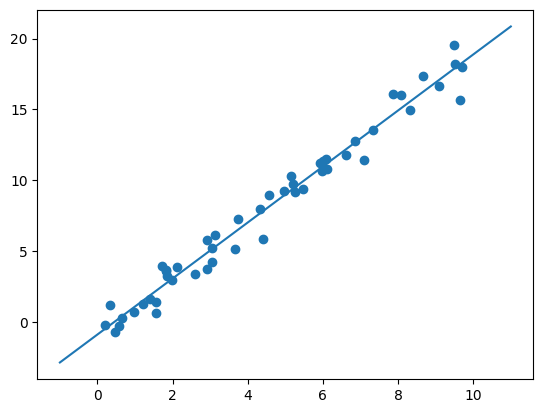

In [20]:
plt.scatter(x,y)
plt.plot(x_fit,y_fit)

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris, random_state=1)

In [23]:
from sklearn.naive_bayes import GaussianNB

In [24]:
model=GaussianNB()

In [25]:
model.fit(X_train, y_train)

GaussianNB()

Evaluating the model

In [26]:
y_model=model.predict(X_test)

In [27]:
from sklearn.metrics import accuracy_score

In [28]:
accuracy_score(y_test, y_model)

0.9736842105263158

SCIKIT LEARN 2

In [29]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [30]:
from sklearn.decomposition import PCA

In [31]:
model=PCA(n_components=2)

In [32]:
model.fit(X_iris)

PCA(n_components=2)

In [34]:
X_2D=model.transform(X_iris)

In [35]:
iris['PCA1'] = X_2D[:,0]
iris['PCA2'] = X_2D[:,1]

In [36]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,PCA1,PCA2
0,5.1,3.5,1.4,0.2,setosa,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,setosa,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,setosa,-2.888991,-0.144949
3,4.6,3.1,1.5,0.2,setosa,-2.745343,-0.318299
4,5.0,3.6,1.4,0.2,setosa,-2.728717,0.326755


In [44]:
import pandas as pd

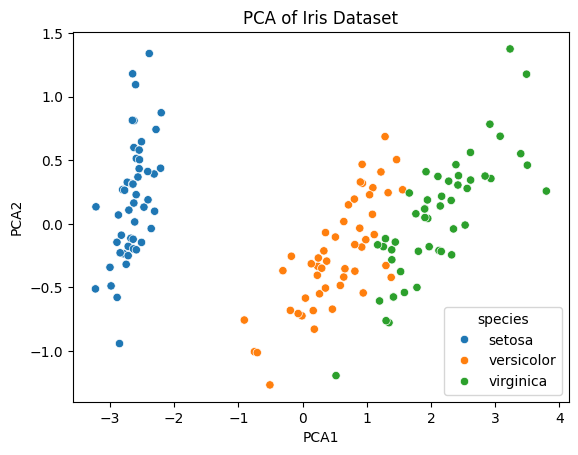

In [49]:
sns.scatterplot(data=iris, x='PCA1', y='PCA2', hue='species')
plt.title('PCA of Iris Dataset')
plt.show()

In [50]:
from sklearn.mixture import GaussianMixture

In [51]:
model=GaussianMixture(n_components=3, covariance_type='full')

In [52]:
model.fit(X_iris)

GaussianMixture(n_components=3)

In [53]:
y_gmm=model.predict(X_iris)

In [54]:
iris['grouping']=y_gmm

In [55]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,PCA1,PCA2,grouping
0,5.1,3.5,1.4,0.2,setosa,-2.684126,0.319397,1
1,4.9,3.0,1.4,0.2,setosa,-2.714142,-0.177001,1
2,4.7,3.2,1.3,0.2,setosa,-2.888991,-0.144949,1
3,4.6,3.1,1.5,0.2,setosa,-2.745343,-0.318299,1
4,5.0,3.6,1.4,0.2,setosa,-2.728717,0.326755,1


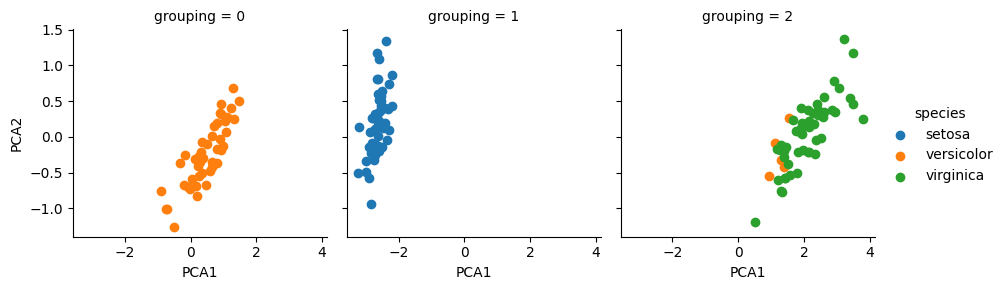

In [60]:
g = sns.FacetGrid(iris, col='grouping', hue='species')
g.map(plt.scatter, 'PCA1', 'PCA2')
g.add_legend()

plt.show()

In [61]:
from sklearn.datasets import load_digits

In [62]:
digits=load_digits()

In [63]:
digits.images.shape

(1797, 8, 8)

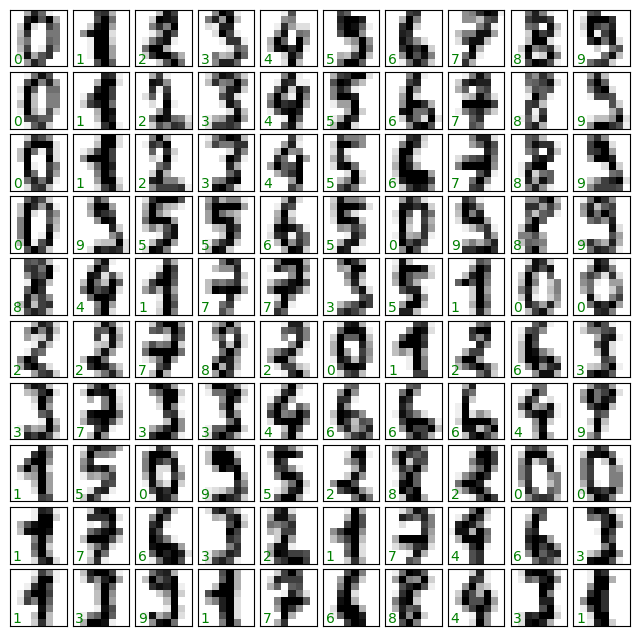

In [64]:
fig, axes=plt.subplots(10,10, figsize=(8,8), subplot_kw={'xticks' :[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
    
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]), transform=ax.transAxes, color='green')


In [65]:
X=digits.data
y=digits.target
print(X.shape)
print(y.shape)

(1797, 64)
(1797,)


In [66]:
from sklearn.manifold import Isomap

In [67]:
iso=Isomap(n_components=2)

In [68]:
iso.fit(X)

c:\users\sıla\appdata\local\programs\python\python39\lib\site-packages\sklearn\manifold\_isomap.py:359: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
c:\users\sıla\appdata\local\programs\python\python39\lib\site-packages\scipy\sparse\_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


Isomap()

In [69]:
data2=iso.transform(X)
data2.shape

(1797, 2)

C:\Users\Sıla\AppData\Local\Temp\ipykernel_2924\762816878.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('tab10',10))


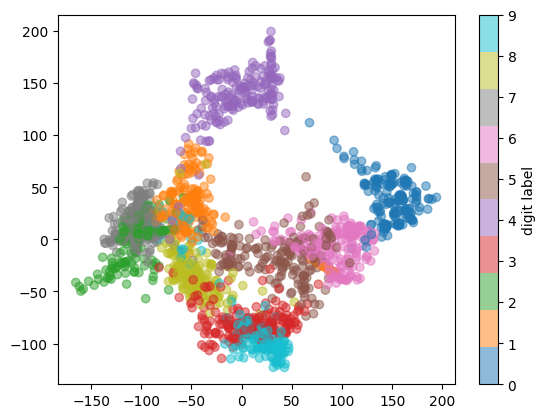

In [71]:
plt.scatter(data2[:,0],data2[:,1],c=digits.target, alpha=0.5,
           cmap=plt.cm.get_cmap('tab10',10))
plt.colorbar(label='digit label',ticks=range(10))

In [72]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test=train_test_split(X,y, random_state=0)

In [73]:
from sklearn.naive_bayes import GaussianNB

In [74]:
model=GaussianNB()

In [75]:
model.fit(X_train,y_train)

GaussianNB()

Predicting the model

In [76]:
y_model=model.predict(X_test)

In [77]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_model)

0.8333333333333334

Evaluating the model

In [78]:
from sklearn.metrics import confusion_matrix
mat=confusion_matrix(y_test,y_model)

Text(113.9222222222222, 0.5, 'real value')

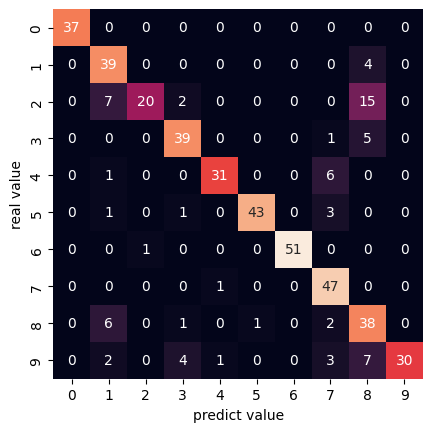

In [79]:
sns.heatmap(mat,square=True, annot=True, cbar=False)
plt.xlabel('predict value')
plt.ylabel('real value')